# Session 5 - Increased Model Complexity


Python Notebook [Colab/Jupyter] includes:
* Important libraries overview
* Model selection -logistic regression, decision treerandom forest & xgboost
* Scale with standard scaler
* Split data - train, test, validation
* Compare models
* Advanced model building
* Hyperparameter tuning -  quick high level overview
* Model optimization - quick high level overview
* Evaluation metrics
* Testing accuracy
* Pycaret for comparring models? - *Bonus session
* Can you improve the model? Regularization, Stacking - *Bonus sesssion
* Use case integration and model deployment - *Bonus session


Import your necessary libraries and packages!

In [ ]:
!pip install xgboost

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import xgboost as xgb


In [ ]:
# read the cleaned data
df = pd.read_csv('/content/clean_data.csv') # use cleaned data from Session 3!
df.head()

,Acousticness,Danceability,Duration,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,Time_Signature,Valence,Target,TempoVariability,TempoRange
0,-0.682956,1.332913,-0.508052,-1.179049,-0.407036,2,-0.165984,-0.457521,1,3.777457,1.066649,4,-0.855011,1,1.000249,6.42666
1,0.044243,0.773779,0.983794,-1.535847,-0.464896,1,-0.346011,-0.885152,1,-0.146977,1.442230,4,0.367140,1,1.000249,6.42666
2,-0.589746,1.363976,-0.738452,-1.283709,-0.486428,2,-0.204561,-0.018972,1,2.192503,-1.744977,4,-1.312305,1,1.000249,6.42666
3,1.604177,-0.773161,-0.571307,-1.635750,1.381537,5,-0.634054,-2.172574,1,-0.741893,-1.316813,4,-1.081634,1,1.000249,6.42666
4,-0.028939,0.369959,1.788174,-0.574871,1.388866,5,1.595710,-1.217193,0,-0.258593,1.963980,4,1.645946,1,1.000249,6.42666


Data Preprocessing:

**Scale the data**

In many cases, **StandardScaler is a good default choice** for the following reasons:

**Outlier Handling:** StandardScaler is less affected by outliers than MinMaxScaler. In MinMaxScaler, if your data has outliers, they might end up squishing the rest of the data into a narrow range close to the minimum value. StandardScaler, on the other hand, does not have a fixed range and is less affected by extreme values.

**Algorithm Requirements:** Some algorithms assume that the data is normally distributed, or at least symmetrically distributed, around the mean. StandardScaler makes the mean of each feature 0 and scales the feature to unit variance, which can be a good preprocessing step if your algorithm makes this assumption.

**Interpretability:** After standardization, the values of the features represent how many standard deviations they are away from the mean. This can sometimes be easier to interpret than the range used in MinMaxScaler.

However, it's important to note that not all data and not all algorithms benefit from standardization. For example, if your data has a natural minimum and maximum value and does not contain outliers, MinMaxScaler might be a better choice. Similarly, some algorithms, like decision tree-based algorithms, do not require feature scaling at all.

For the Spotify Song Attributes dataset, the features are various attributes of the songs like 'acousticness', 'danceability', 'energy', etc. These features are likely to have different scales and could contain outliers, so using StandardScaler could be a reasonable choice.

Also, even though scaling is not necessary for tree-based models because they are not sensitive to scale, it might still be beneficial if you're comparing these models with other models that do require scaling, or if you're using regularization or feature importance methods that are sensitive to the scale of the features.

Prepare and split the data into train and test sets.


In [ ]:
#checking class imbalance
df['Target'].value_counts()

1    1015
0     997
Name: Target, dtype: int64

In [ ]:
Target_count = df['Target'].value_counts()
(Target_count)/ len(df) * 100

1    50.447316
0    49.552684
Name: Target, dtype: float64

We observe that the class imbalance between 1 and 0 is negligble thus we move forward and standardize the data

In [ ]:
#Separating target variable from dataset
y = df['Target']
X = df.drop('Target', axis=1)

In [ ]:
#Checking data type of each column in our dataframe
X.dtypes

Acousticness        float64
Danceability        float64
Duration            float64
Energy              float64
Instrumentalness    float64
Key                   int64
Liveness            float64
Loudness            float64
Mode                  int64
Speechiness         float64
Tempo               float64
Time_Signature        int64
Valence             float64
TempoVariability    float64
TempoRange          float64
dtype: object

In [ ]:
#selecting numeric columns from our dataset
numeric_col = X.select_dtypes(include='number').columns
numeric_col

Index(['Acousticness', 'Danceability', 'Duration', 'Energy',
       'Instrumentalness', 'Key', 'Liveness', 'Loudness', 'Mode',
       'Speechiness', 'Tempo', 'Time_Signature', 'Valence', 'TempoVariability',
       'TempoRange'],
      dtype='object')

In [ ]:
#Created a function to standardize all numeric columns in a dataframe
std_scaler = StandardScaler()
def standardization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df

In [ ]:
#Passing the dataframe and the numeric colums as parameters to the standardization function which standardizes all numeric values in a dataframe
df_standardized = standardization(X,numeric_col)

In [ ]:
df_standardized.head()

,Acousticness,Danceability,Duration,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,Time_Signature,Valence,TempoVariability,TempoRange
0,-0.682956,1.332913,-0.508052,-1.179049,-0.407036,-0.917848,-0.165984,-0.457521,0.795686,3.777457,1.066649,0.124205,-0.855011,4.440892e-16,-1.776357e-15
1,0.044243,0.773779,0.983794,-1.535847,-0.464896,-1.191922,-0.346011,-0.885152,0.795686,-0.146977,1.442230,0.124205,0.367140,4.440892e-16,-1.776357e-15
2,-0.589746,1.363976,-0.738452,-1.283709,-0.486428,-0.917848,-0.204561,-0.018972,0.795686,2.192503,-1.744977,0.124205,-1.312305,4.440892e-16,-1.776357e-15
3,1.604177,-0.773161,-0.571307,-1.635750,1.381537,-0.095626,-0.634054,-2.172574,0.795686,-0.741893,-1.316813,0.124205,-1.081634,4.440892e-16,-1.776357e-15
4,-0.028939,0.369959,1.788174,-0.574871,1.388866,-0.095626,1.595710,-1.217193,-1.256777,-0.258593,1.963980,0.124205,1.645946,4.440892e-16,-1.776357e-15


**Method 1: Model Evaluation without using validation set**

In [ ]:
#importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
#Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

**Applying Logistic Regression - evaluate on *accuracy* because classes are relatively balanced. Accuary = proportion of predictions that the model got right**

When selecting evaluation metrics for classification, it's crucial to consider the real-world implications of different types of errors. The choice of metric should reflect the costs and benefits associated with true positives, false positives, true negatives, and false negatives.

For instance, in a medical diagnosis scenario, a false negative (failing to identify a disease when it is present) could have severe consequences, potentially leading to a lack of treatment and worsening health. In this case, a high recall (sensitivity) would be important to minimize false negatives.

On the other hand, in a spam detection scenario, a false positive (labeling a legitimate email as spam) could lead to important messages being missed, but it's not as critical as missing a serious disease. Here, precision (ensuring that when we predict spam, we're correct) might be more important.

In some cases, both types of errors could be equally costly, in which case a balance between precision and recall, such as the F1 score, might be appropriate.

The choice of metric should align with the real-world outcomes and the specific costs associated with different types of prediction errors.

**Logisic Regression** is a supervised learning algorithm that is used for classification problems and is simple to implement and easy to interpret.

In [ ]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.6650124069478908

Applying **Decision Trees** which is a supervised learning algorithm that is used for classification problems that uses a tree-like structure to make predictions based on a set of features and criteria. It is simple to understand and interpret and it can handle both numerical and categorical data.

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.6923076923076923

Applying **Random Forest** with is a supervised learning algorithm that is used for both classification and regression tasks. It is an ensemble learning method that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random Forests correct for decision trees' habit of overfitting to their training set and are able to handle both numerical and categorical data. They are robust to outliers and can handle unbalanced data well.

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7990074441687345

**Method 2: Using K Fold Cross Validation**





K-fold cross-validation is a technique used for assessing how a machine learning model will generalize to an independent data set. It involves dividing the original sample into 'k' equal sized subsamples or 'folds'. Of the 'k' subsamples, a single subsample is retained as the validation data for testing the model, and the remaining 'k-1' subsamples are used as training data. The cross-validation process is then repeated 'k' times, with each of the 'k' subsamples used exactly once as the validation data. The 'k' results from the folds can then be averaged (or otherwise combined) to produce a single estimation. The advantage of this method is that it matters less how the data gets divided. Every data point gets to be in a test set exactly once, and gets to be in a training set 'k-1' times.

In [ ]:
from sklearn.model_selection import cross_val_score

Applying Logistic Regression

In [ ]:
#Take k=10 folds for our problem
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X, y,cv=10)

array([0.71287129, 0.5990099 , 0.65671642, 0.64179104, 0.59701493,
       0.4079602 , 0.72636816, 0.5721393 , 0.67164179, 0.56716418])

cross_val_score return an array with accuracy scores of each split and by default uses Stratified Kfold for splitting

Applying Decision Trees

In [ ]:
cross_val_score(DecisionTreeClassifier(), X, y,cv=10)

array([0.72277228, 0.68316832, 0.74129353, 0.64676617, 0.6318408 ,
       0.68656716, 0.62686567, 0.6119403 , 0.66169154, 0.62189055])

Applying Random Forest Ensemble Method

In [ ]:
cross_val_score(RandomForestClassifier(), X, y,cv=10)

array([0.85643564, 0.75742574, 0.84079602, 0.71641791, 0.69651741,
       0.62686567, 0.77114428, 0.74626866, 0.74129353, 0.71144279])

Hyperparameter Tuning on Random Forest: increase the number of trees or unique predictions trained independently on a random subset of the data.

In [ ]:
rf = RandomForestClassifier(n_estimators = 5)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7096774193548387

In [ ]:
rf = RandomForestClassifier(n_estimators = 50)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.794044665012407

In [ ]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8014888337468983

As we are tuning the attribute of Random Forest Classifier, we see that the accuracy score is increasing. Thus hyperparameter tuning helps us to fine tune our model to yeild better accuracy/score

*Tuning other hyperparameters:* Besides n_estimators, there are many other hyperparameters that could be tuned to optimize the model. For example, in a RandomForestClassifier, you could tune max_depth (the maximum depth of the trees), min_samples_split (the minimum number of samples required to split an internal node), and max_features (the number of features to consider when looking for the best split), among others. In XGBoost, you could tune learning_rate, max_depth, min_child_weight, and many others.

**Method 3: Advanced Model Optimization: XGBoost with validation set**

XGBoost, short for "Extreme Gradient Boosting", is a powerful machine learning algorithm used for both regression and classification tasks. It's based on the concept of 'boosting', which involves training a sequence of weak models, typically decision trees, each one learning from the mistakes of its predecessors.

Here's a simple explanation of how XGBoost works for classification:

Initialization: XGBoost starts by predicting a constant value for all instances in the dataset. This could be the most frequent class in a classification problem.

Sequential Learning: XGBoost then enters a loop where it repeatedly builds new decision trees. Each tree is trained to correct the mistakes made by the entire ensemble of all previous trees.

Gradient Boosting: The 'Gradient Boosting' part of XGBoost comes from the fact that each new tree is specifically designed to reduce the 'gradient of the loss'. This means that each tree is trying to correct the errors of the previous ensemble, with more emphasis on instances that were harder to predict.

Regularization: XGBoost also includes a regularization term in its objective function that penalizes complex models. This helps to prevent overfitting.

Tree Pruning: Unlike other boosting algorithms, XGBoost uses a technique called 'post-pruning', where trees are allowed to grow to their maximum depth during training, and then unnecessary branches are pruned off.

Prediction: Once all the trees have been built, making a prediction involves adding up the predictions of all individual trees.

The power of XGBoost comes from the fact that it combines the predictive power of hundreds or thousands of individual decision trees, each one helping to correct the mistakes of its predecessors. This allows it to model complex patterns in data and often results in superior predictive performance.


In [ ]:
from sklearn.model_selection import train_test_split

# First split the data into a training set and a temporary set using an 80-20 split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Then split the training set into a training set and a validation set using an 80-20 split
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

In [ ]:
# Create an XGBoost classifier object
xgb_clf = xgb.XGBClassifier()

# Train the classifier using the training data
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

We will continue to evaluate on the metric accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

# Predict the labels for the validation set
y_val_pred = xgb_clf.predict(X_val)

# Compute the accuracy of the XGBoost model
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

Validation Accuracy: 72.36%


Hyperparameter Tuning

**n_estimators:** This is the number of trees you want to build before taking the maximum voting or averages of predictions. Higher number of trees gives you better performance but makes your code slower. You should choose as high value as your processor can handle because this makes your predictions stronger and more stable.

**max_depth:** This indicates how deeply each tree is allowed to grow during any boosting round. A smaller value will make the algorithm more conservative and prevent overfitting but too small values might lead to under-fitting.

**learning_rate:** This determines the impact of each tree on the final outcome. GBM works by starting with an initial estimate which is updated using the output of each tree. The learning parameter controls the magnitude of this change in the estimates. Lower values are generally preferred as they make the model robust to the specific characteristics of tree and thus allowing it to generalize well.

**min_child_weight:**This parameter refers to the minimum sum of weights of all observations required in a child. This is similar to min_child_leaf in GBM but not exactly. This refers to the minimum sum of weights of observations while GBM has min number of observations for the leaf.

**booster:** It's the booster type to use. gbtree, gblinear or dart. gbtree and dart use tree based models while gblinear uses linear functions.

**base_score:** It's the initial prediction score of all instances, global bias.

**GridSearchCV** allows you to define a grid of possible values for these hyperparameters and then it will automatically perform cross-validation for each combination of parameters to find the best ones.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth':[2, 3, 5, 10, 15],
    'learning_rate':[0.05, 0.1, 0.15, 0.2],
    'min_child_weight':[1, 2, 3, 4],
    'booster':['gbtree', 'gblinear'],
    'base_score':[0.25, 0.5, 0.75, .99]
}

# Set up the grid search with 4-fold cross validation
xgb_cv = GridSearchCV(estimator=xgb_clf,
                      param_grid=hyperparameter_grid,
                      cv=4,
                      scoring = 'accuracy',
                      n_jobs = -1,
                      verbose = 1)

# Fit the grid search model
xgb_cv.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_val, y_val)],verbose=False)

Fitting 4 folds for each of 3200 candidates, totalling 12800 fits


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'base_score': [0.25, 0.5, 0.75, 0.99],
                         'booster': ['gbtree', 'gblinear'],
                         'learning_rate': [0.05, 0.1, 0.15, 0.2],
                         'max_depth': [2, 3, 5, 10, 15],
                         'min_child_weight': [1, 2, 3, 4],
                         'n_estimators': [50, 100, 150, 200, 250]},
             scoring='accuracy', verbose=1)

**estimator:** The model for which you want to optimize parameters.
param_grid: The dictionary of parameters you want to try (in this case, the hyperparameter_grid).
cv: The number of cross-validation folds to use for validating your model.
**scoring:** The scoring metric to use when deciding the best parameters. In this case, it's accuracy.
**n_jobs:** The number of jobs to run in parallel. -1 means using all processors.
**verbose:** Controls the verbosity: the higher, the more messages.

In [ ]:
# Print the best hyperparameters found
print(xgb_cv.best_params_)

# Get the best model
best_xgb_clf = xgb_cv.best_estimator_

# Predict the labels for the validation set
y_val_pred = best_xgb_clf.predict(X_val)

# Compute the accuracy of the XGBoost model
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

{'base_score': 0.75, 'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 3, 'n_estimators': 50}
Validation Accuracy: 73.91%


If the cell above is taking too long, use **Randomized Search:** Instead of trying out every single combination of hyperparameters (which is what Grid Search does), Randomized Search picks a random subset of the combinations. This can significantly reduce the computation time.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth':[2, 3, 5, 10, 15],
    'learning_rate':[0.05, 0.1, 0.15, 0.2],
    'min_child_weight':[1, 2, 3, 4],
    'booster':['gbtree', 'gblinear'],
    'base_score':[0.25, 0.5, 0.75, .99]
}

# Set up the random search with 10-fold cross validation
xgb_cv = RandomizedSearchCV(estimator=xgb_clf,
                      param_distributions=hyperparameter_grid,
                      cv=20,
                      scoring = 'accuracy',
                      n_jobs = -1,
                      verbose = 1)

# Fit the grid search model
xgb_cv.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_val, y_val)],verbose=False)

Fitting 20 folds for each of 10 candidates, totalling 200 fits


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


RandomizedSearchCV(cv=20,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rat...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 0.99],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='accuracy', verbose=1)

In [ ]:
# Print the best hyperparameters found
print(xgb_cv.best_params_)

# Get the best model
best_xgb_clf = xgb_cv.best_estimator_

# Predict the labels for the validation set
y_val_pred = best_xgb_clf.predict(X_val)

# Compute the accuracy of the XGBoost model
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

{'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 15, 'learning_rate': 0.1, 'booster': 'gbtree', 'base_score': 0.75}
Validation Accuracy: 74.22%


The test set is typically used as the final evaluation of the model. It is supposed to represent unseen data and give an unbiased estimate of the model's performance in the real world.

The validation set, on the other hand, is used during the model building and tuning process. It helps in tuning the hyperparameters, selecting the best model, and preventing overfitting on the training data.

In [ ]:
# Predict the labels for the test set
y_test_pred = best_xgb_clf.predict(X_test)

# Compute the accuracy of the XGBoost model
accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 74.94%


Let's visualze the results with a confusion matrix on the test predictions.

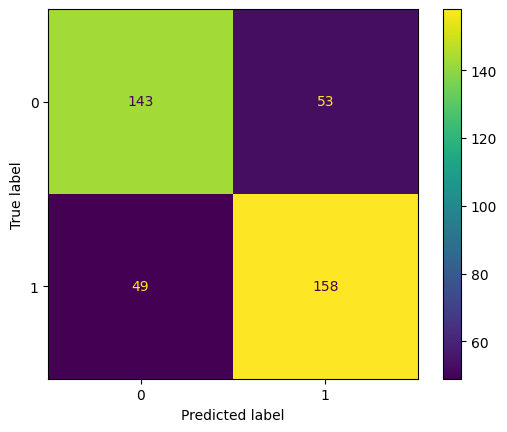

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict the labels for the test set
y_test_pred = best_xgb_clf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Display the confusion matrix
cmd = ConfusionMatrixDisplay(cm, display_labels=best_xgb_clf.classes_)
cmd.plot()

#What are your observations about our model comparrisons?


**Reasons why a basic Random Forest model with n_estimators=100 is outperforming more complex models:**

**Overfitting:** More complex models, such as gradient boosting or deep learning models, have a higher capacity and can therefore fit the training data more closely. However, this can lead to overfitting, where the model learns the noise in the training data and performs poorly on unseen data.

**Hyperparameters:** The performance of complex models can be highly dependent on their hyperparameters. If these are not tuned correctly, the model may perform poorly. In contrast, Random Forest models are often quite robust to the choice of hyperparameters.

**Data characteristics:** Random Forests can perform very well on certain types of data. For example, they can handle categorical variables and interactions between features well, and they are not affected by feature scaling. If your data has these characteristics, a Random Forest may outperform more complex models.

**Noise:** If your data is noisy, simpler models can often perform better because they are less likely to fit the noise in the data.

**Model Complexity vs. Data Complexity:** If the underlying data pattern is not very complex, simpler models like Random Forest can capture the pattern well enough and there might not be much benefit in using a more complex model.

More complex does not always mean better. It's always a good idea to start with simpler models and only move to more complex ones if the simpler models are not sufficient.

#How do we interpret the results in the context of our problem?

##Conclusion
In this notebook, we have covered several important topics in machine learning, including:

**Important libraries: **We have used several important Python libraries such as pandas, numpy, sklearn, matplotlib, and seaborn.

**Model selection:** We have trained and evaluated four different models - Logistic Regression, Decision Tree, Random Forest, and XGBoost.

**Data Scaling:** We have used StandardScaler to scale our data.

**Data Splitting:** We have split our data into training, validation, and test sets.

**Model Comparison:** We have compared the performance of our models using accuracy as the metric.

**Advanced Model Building:** We have used advanced techniques such as hyperparameter tuning and model optimization to improve the performance of our models.

**Hyperparameter Tuning:** We have used GridSearchCV to tune the hyperparameters of our XGBoost model.

**Model Optimization:** We have optimized our XGBoost model by finding the best hyperparameters.

**Evaluation Metrics:** We have used accuracy as our evaluation metric and also generated a confusion matrix to evaluate our model's performance.

**Testing Accuracy:** We have evaluated the final performance of our model on the test set.

Through this process, we have gained a deeper understanding of how to build, tune, and evaluate machine learning models in a data science project. We have also seen how different models perform on the same dataset and learned how to optimize our models for better performance.

***Finding the right approach for your and knowing  what machine learning tools to use for your solitions is the key to a successful data science project.***